In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import skgeom
from skgeom.draw import draw
from skgeom import voronoi

from matplotlib import pyplot as plt
import matplotlib.patches as patches

import math

In [4]:
a = skgeom.Point2(4, 5)
b = skgeom.Point2(2, 1)
c = skgeom.Point2(3, 6)
d = skgeom.Point2(5,2)
print('a:', a)

a: PointC2(4, 5)


### Point_2

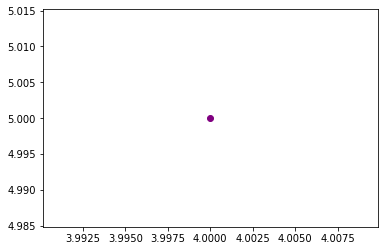

In [5]:
draw(a, color='purple')

### Point_list

In [6]:
point_list = [a,b,c,d]
print(point_list)

[PointC2(4, 5), PointC2(2, 1), PointC2(3, 6), PointC2(5, 2)]


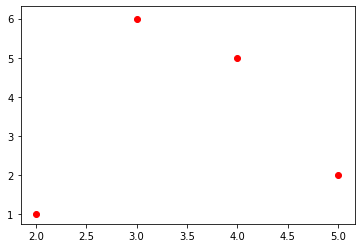

In [7]:
draw(point_list, color = 'red')

### Vector_2

In [8]:
vector = skgeom.Vector2(a, c)
print(vector)

VectorC2(-1, 1)


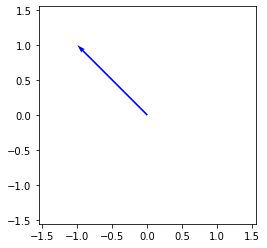

In [9]:
draw(vector, display_range=1.5, color='blue')

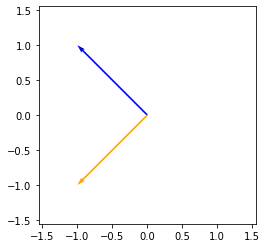

In [10]:
draw(vector, color='blue')
draw(vector.perpendicular(skgeom.Sign.COUNTERCLOCKWISE), display_range=1.5, color='orange')

### Ray_2

In [11]:
ray = skgeom.Ray2(a, d)
print(ray)

RayC2(PointC2(4, 5), PointC2(5, 2))


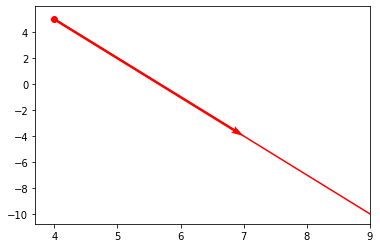

In [12]:
draw(ray, arrow=True, color='red')

### Direction_2

In [13]:
direction = skgeom.Direction2(vector)
print(direction)

DirectionC2(-1, 1)


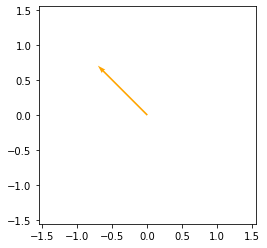

In [14]:
draw(direction, display_range=1.5, color='orange')

### Bbox_2

In [15]:
bbox = a.bbox() + b.bbox() + c.bbox()
print(bbox)

Bbox_2(2, 1, 4, 6)


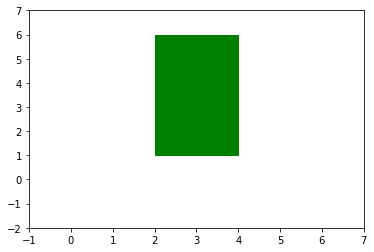

In [16]:
draw(bbox, display_range=3, fill=True, color='green')

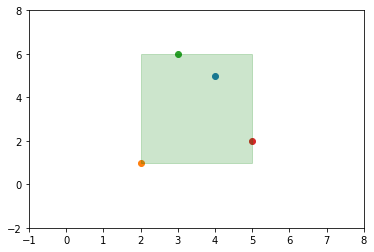

In [17]:
bbox = a.bbox() + b.bbox() + c.bbox() + d.bbox()

draw(bbox, display_range=3, fill=True, color='green', alpha=0.2)
draw([a,b,c,d])

### Line_2

In [18]:
line = skgeom.Line2(a, b)
print(line)

Line_2(4, -2, -6)


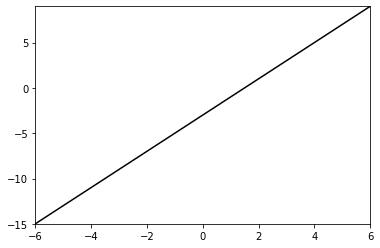

In [19]:
draw(line, start=-6, stop=6, num=150, color='black')

### Iso_rectangle_2

In [20]:
iso_rectangle = skgeom.IsoRectangle2(b, a, d, c)
print(iso_rectangle)

Iso_rectangle_2(PointC2(2, 2), PointC2(4, 6))


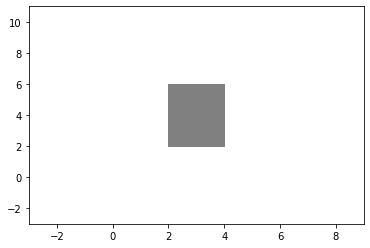

In [21]:
draw(iso_rectangle, display_range=5, fill=True, color='grey')

### Segment_2

In [22]:
segment = skgeom.Segment2(c,d)
print(segment)

Segment_2(PointC2(3, 6), PointC2(5, 2))


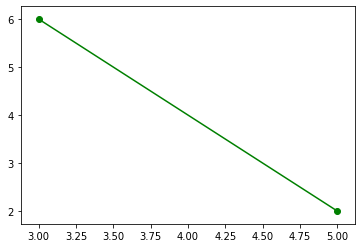

In [23]:
draw(segment, color='green')

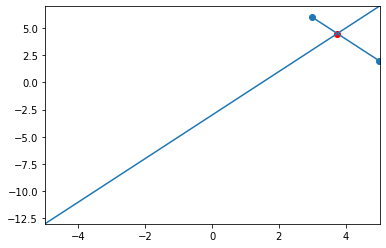

In [24]:
pinter = skgeom.intersection(line, segment)
draw(segment)
draw(line)
draw(pinter, color='red')

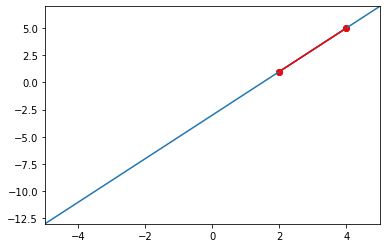

In [25]:
segment = skgeom.Segment2(a, b)
pinter = skgeom.intersection(line, segment)
draw(segment)
draw(line)
draw(pinter, color='red')

### Circle

In [26]:
circle = skgeom.Circle2(a,b,c)
print(circle)

Circle_2(PointC2(1.66667, 3.66667), 7.22222, clockwise)


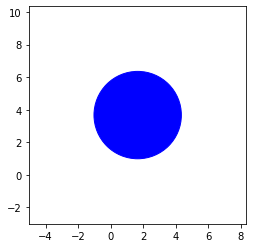

In [27]:
draw(circle, display_range=4, fill=True, color='blue')

### Polygon

In [28]:
polygon = skgeom.Polygon([a, c, b, d])
print(polygon)

Polygon_2(
  PointC2(4, 5)
  PointC2(3, 6)
  PointC2(2, 1)
  PointC2(5, 2)
)



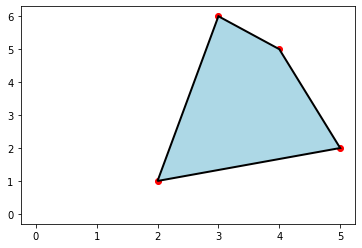

In [29]:
draw(polygon, facecolor='lightblue', point_color='red')

In [30]:
e = skgeom.Point2(3,2)
f = skgeom.Point2(4,2)
g = skgeom.Point2(4,4)
h = skgeom.Point2(3,4)

### PolygonWithHoles

In [31]:
polygon2 = skgeom.Polygon([e, f, g, h])
polygon_with_holes = skgeom.PolygonWithHoles(polygon, [polygon2])
print(polygon_with_holes)

Polygon_with_holes_2(
Boundary(
Polygon_2(
  PointC2(4, 5)
  PointC2(3, 6)
  PointC2(2, 1)
  PointC2(5, 2)
)

Holes
1
 Polygon_2(
  PointC2(3, 2)
  PointC2(4, 2)
  PointC2(4, 4)
  PointC2(3, 4)
)

)



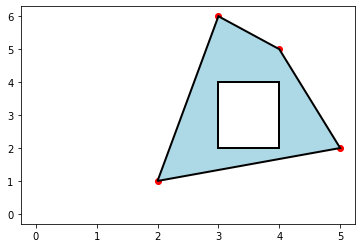

In [32]:
draw(polygon, polygon_with_holes=polygon_with_holes, facecolor='lightblue', point_color='red')

### Voronoi Diagram

In [33]:
point_list+= [e, f, g, h]
voronoi_diagram = voronoi.VoronoiDiagram()
for point in point_list:
    voronoi_diagram.insert(point)
print(voronoi_diagram)

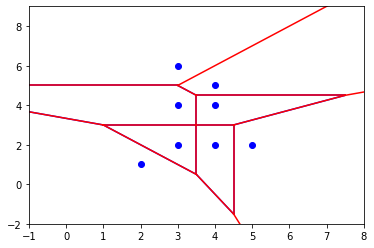

In [34]:
draw(voronoi_diagram, visible_point=False, sites_color='blue', finite_edges_color='red')

### Polyhedron

In [35]:
# define a cube

vertices = [
    skgeom.Point3(0,0,0), #0
    skgeom.Point3(1,0,0), #1
    skgeom.Point3(1,1,0), #2
    skgeom.Point3(0,1,0), #3
    skgeom.Point3(0,0,1), #4
    skgeom.Point3(1,0,1), #5
    skgeom.Point3(1,1,1), #6
    skgeom.Point3(0,1,1)  #7
]

vertex_indices = [
    [0,2,1], # bottom
    [0,3,2],
    [0,1,5], # front
    [0,5,4],
    [1,2,6], # right
    [1,6,5],
    [2,3,7], # rear
    [2,7,6],
    [3,0,4], # left
    [3,4,7],
    [4,5,6], # top
    [4,6,7]
]

cube = skgeom.polyhedron_from_vertices_and_vertex_indices(vertices, vertex_indices)
cube.is_closed()

True

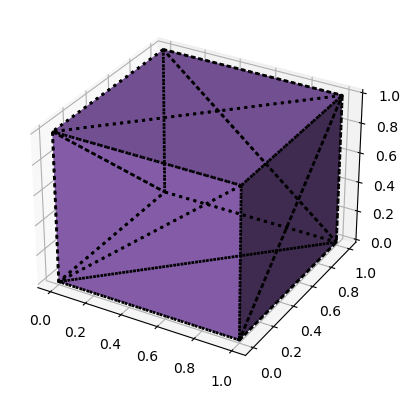

In [47]:
draw(cube, color='C4', linewidths = 2, linestyles='dotted')

### Nef Polyhedron

In [48]:
vertices2 = [
    skgeom.Point3(1.,0.,0.),
    skgeom.Point3(1.,1.,0.),
    skgeom.Point3(1.,0.,1.),
    skgeom.Point3(0.,0.,0.)
]
vertex_indices2 = [
    [0,3,1], 
    [0,1,2], 
    [1,3,2], 
    [3,0,2]
]

tetra = skgeom.polyhedron_from_vertices_and_vertex_indices(vertices2, vertex_indices2)
nef_tetra = skgeom.NefPolyhedron3(tetra)
nef_cube = skgeom.NefPolyhedron3(cube)

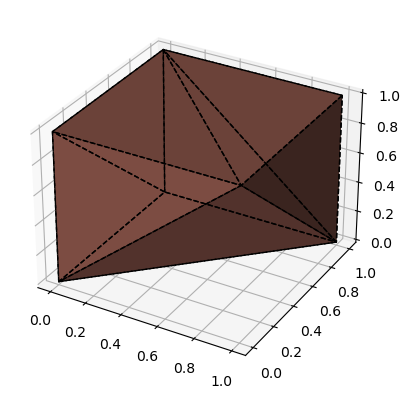

In [52]:

draw((nef_cube - nef_tetra), color="C5")